## EDA-Impact of Outliers On Machine Learning Usecases

In [2]:
import pandas as pd
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0, 0.5, 'No.of Passengers')

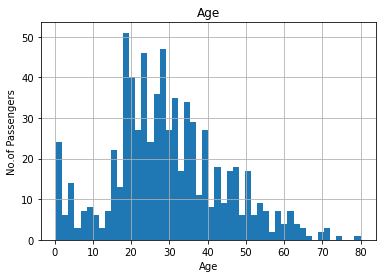

In [5]:
#histogram before replacement of outliers
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No.of Passengers')

In [6]:
# (mean +/- 3*std) is applied to only Normally Distributed Data
upper_boundary = df["Age"].mean() + 3*df["Age"].std()
lower_boundary = df["Age"].mean() - 3*df["Age"].std()
print("lower_boundary = ",lower_boundary), 
print("mean = ",df["Age"].mean()),
print("upper_boundary = ",upper_boundary)


lower_boundary =  -13.88037434994331
mean =  29.69911764705882
upper_boundary =  73.27860964406095


In [7]:
# replacing outliers in "Age" with "upper_boundary"

data = df.copy()
data.loc[data.Age > 73.3, 'Age']= 73.3

Text(0, 0.5, 'No.of Passengers')

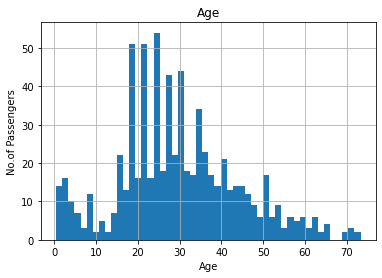

In [9]:
figure = data.Age.hist(bins=50) # "df" is replaced with "data"
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No.of Passengers')

### Example 2: Feature "Fare"

Text(0, 0.5, 'No.of Passengers')

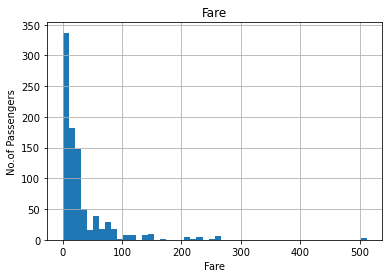

In [11]:
#histogram before replacement of outliers
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No.of Passengers')

In [14]:
# Computing the (IQR) Inter Quartile Range
# IQR = 75th percentile - 25th Percentile
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

In [15]:
# extreme outliers
lower_extreme=df['Fare'].quantile(0.25)-(IQR*3) # 1.5 is replaced with 3
upper_extreme=df['Fare'].quantile(0.75)+(IQR*3)

print("lower_extreme = ",lower_extreme) # "Age" can not be negative
print("upper_extreme = ",upper_extreme) # still leass than "max"(max= 512.329200)

lower_extreme =  -61.358399999999996
upper_extreme =  100.2688


In [17]:
# replacing  Outliers in "Fare" with "upper_extreme"

data = df.copy()
data.loc[data.Fare > 100.3, 'Fare'] = 100.3

Text(0, 0.5, 'No.of Passengers')

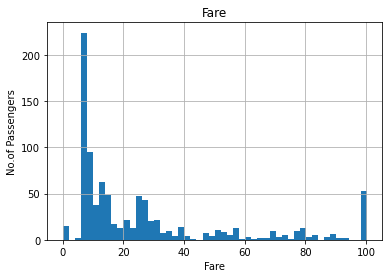

In [19]:
# Histogram After replacement of outliers with "upper_extreme"
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No.of Passengers')

### Applying on ML model

In [20]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'], train_size=0.7)
# "fillna(0)" - filling Nan values with Zero 0
# 70% data is reserved for "Training" &
# remaining 30% data for "Testing"

In [21]:
## Appliing First ML algorithm

# 1) Logistic Regression
# 1) Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test) # for ROC Score

from sklearn.metrics import accuracy_score, roc_auc_score
print("accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

# "accuracy_score" and "roc_auc_score" are almost similar

accuracy_score: 0.664179104477612
roc_auc_score: 0.7283653846153846


In [22]:
### Applying second ML algorithms

# 2) RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test) # for ROC Score

from sklearn.metrics import accuracy_score, roc_auc_score
print("accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

# "roc_auc_score" is slight increased

accuracy_score: 0.6828358208955224
roc_auc_score: 0.728021978021978
